# CH5440 - Assignment 2
## -Himasree Viswanadhapalli (MM17B113)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mean shift

def mean_shift(data):
    return pd.DataFrame(data-np.mean(data))

In [3]:
# get parameters for multi linear regression 
# Calculating beta parameters from this (X_T.X)Beta=(X_T.y)
# inverse(X_T.X) = 1/S_uu and S_yu=(X_T.y)
# B0=y_mean-(X_mean.B_)

def multi_linear_reg(X,y):
    X_T=X.T
    S_uu=np.dot(X_T,X)
    S_uu=pd.DataFrame(np.linalg.pinv(S_uu)) # inversing the matrix S_uu
    S_yu=np.dot(X_T,y)
    B_=np.dot(S_uu,S_yu)
    
    B0=y.mean()-np.dot(X.mean().T,B_)
    
    B_=pd.DataFrame(B_.T)
    B_.columns=X.columns
    

    return B_,B0

# OLS

In [4]:
'''
Defining Ordinary least squares 
y=ax+b
from formulae, a= Syu/Suu and b=y_mean-a(x_mean)
'''
def getOLS(data,fea1, fea2):
    #x,y
    # calculating b

    x_mean=np.mean(data[fea1])
    y_mean=np.mean(data[fea2])

    # calculating numerator and denominator for a

    Syu= np.multiply(np.subtract(data[fea2],y_mean),np.subtract(data[fea1],x_mean))
    Syu=np.sum(Syu)/len(data)
    numerator=Syu

    Suu= np.multiply(np.subtract(data[fea1],x_mean),np.subtract(data[fea1],x_mean))
    Suu=np.sum(Suu)/len(data)
    denominator=Suu
    print('Syu:',Syu,'Suu:',Suu)
    a_OLS=numerator/denominator

    b_OLS=y_mean-a_OLS*x_mean

    print('Slope Parameter of OLS:',a_OLS)
    print('Offset Parameter of OLS:',b_OLS)
#     print(Syu,Suu,x_mean,y_mean)
    return a_OLS,b_OLS

# Question 1

The following gases carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O) and Ozone (O3) in the atmosphere are implicated in increasing global temperatures, and are known as greenhouse gases. The concentration of these gases in the atmosphere and corresponding global average temperatures obtained from the EPA website (https://www.epa.gov/climate-indicators/weather-climate) between the years 1984 to 2014 is given in the Excel file ghg-concentrations_1984-2014.xlsx (units for different variables are also given in Excel sheet).

In [5]:
# import data

data=pd.read_excel('ghg-concentrations_1984-2014.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators  34 non-null     object 
 1   Unnamed: 1                                                                                    32 non-null     object 
 2   Unnamed: 2                                                                                    32 non-null     object 
 3   Unnamed: 3                                                                                    32 non-null     object 
 4   Unnamed: 4                                                                                    32 non-null     object 
 5   Unnamed: 5                      

In [6]:
data.head()

,Source: EPA's Climate Change Indicators in the United States: www.epa.gov/climate-indicators,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Web update: April 2016,NaN,NaN,NaN,NaN,NaN,NaN
1,Temp is deviation from 1901-2000 average,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),NaN,Temp (deg F)
4,1984,344.58,1655.843333,304.149167,282.07525,NaN,0.27


In [7]:
# clean data

data=data[3:]
data.columns=data.iloc[0,:]
data=data[4:]
data.reset_index(drop=True, inplace=True)

# change data type to float
data=data.astype('float')
data.head()

3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),NaN,Temp (deg F)
0,1987.0,349.16,1693.105000,305.145455,279.769180,NaN,0.666
1,1988.0,351.56,1703.948333,306.035833,279.117045,NaN,0.666
2,1989.0,353.07,1717.980833,307.043333,283.993979,NaN,0.522
3,1990.0,354.35,1731.451667,308.169167,280.411319,NaN,0.774
4,1991.0,355.57,1740.968333,308.908333,282.554298,NaN,0.720


In [8]:
# drop nan column

data=data[[           'Year ',        'CO2 (ppm)',        'CH4 (ppb)',
          'N2O (ppb)O3 (', 'O3 (Dobson unit)',           'Temp (deg F)']]
data.head()

3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),Temp (deg F)
0,1987.0,349.16,1693.105000,305.145455,279.769180,0.666
1,1988.0,351.56,1703.948333,306.035833,279.117045,0.666
2,1989.0,353.07,1717.980833,307.043333,283.993979,0.522
3,1990.0,354.35,1731.451667,308.169167,280.411319,0.774
4,1991.0,355.57,1740.968333,308.908333,282.554298,0.720


### Data is cleaned

3                 CO2 (ppm)  CH4 (ppb)  N2O (ppb)O3 (  O3 (Dobson unit)  \
3                                                                         
CO2 (ppm)          1.000000   0.946248       0.997231         -0.010862   
CH4 (ppb)          0.946248   1.000000       0.964379         -0.088517   
N2O (ppb)O3 (      0.997231   0.964379       1.000000         -0.036824   
O3 (Dobson unit)  -0.010862  -0.088517      -0.036824          1.000000   
Temp (deg F)       0.855976   0.807377       0.847564          0.083734   

3                 Temp (deg F)  
3                               
CO2 (ppm)             0.855976  
CH4 (ppb)             0.807377  
N2O (ppb)O3 (         0.847564  
O3 (Dobson unit)      0.083734  
Temp (deg F)          1.000000  


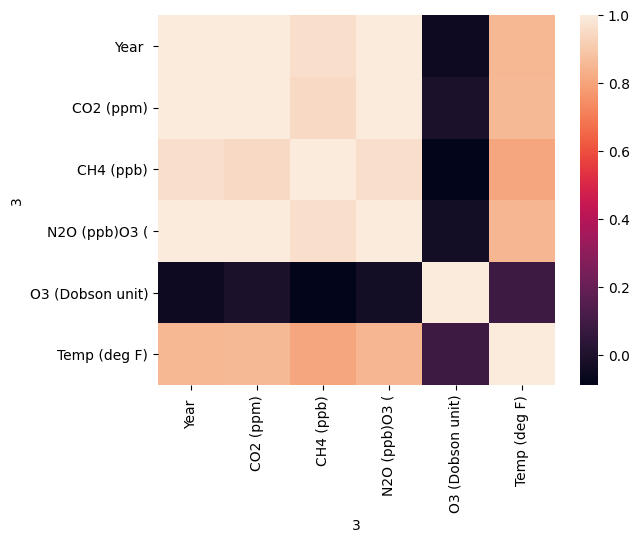

In [9]:
# checking correlation between variables

print(data.drop(['Year '],axis=1).corr())
sns.heatmap(data.corr())
plt.show()

# part (a)
Develop a multilinear regression model between global temperature (deviations) and
concentrations of greenhouse gases using OLS. Is the global temperature positively
correlated with increase in the concentration of these gases?

In [10]:
# mean shift the data
# assuming offset parameter is non zero

data_ms=pd.concat([mean_shift(data.drop(['Temp (deg F)'],axis=1)),data[['Temp (deg F)']]],axis=1)
data_ms.head()

3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),Temp (deg F)
0,-13.5,-22.768571,-83.156429,-10.274282,1.355069,0.666
1,-12.5,-20.368571,-72.313096,-9.383903,0.702934,0.666
2,-11.5,-18.858571,-58.280596,-8.376403,5.579868,0.522
3,-10.5,-17.578571,-44.809762,-7.250570,1.997208,0.774
4,-9.5,-16.358571,-35.293096,-6.511403,4.140187,0.720


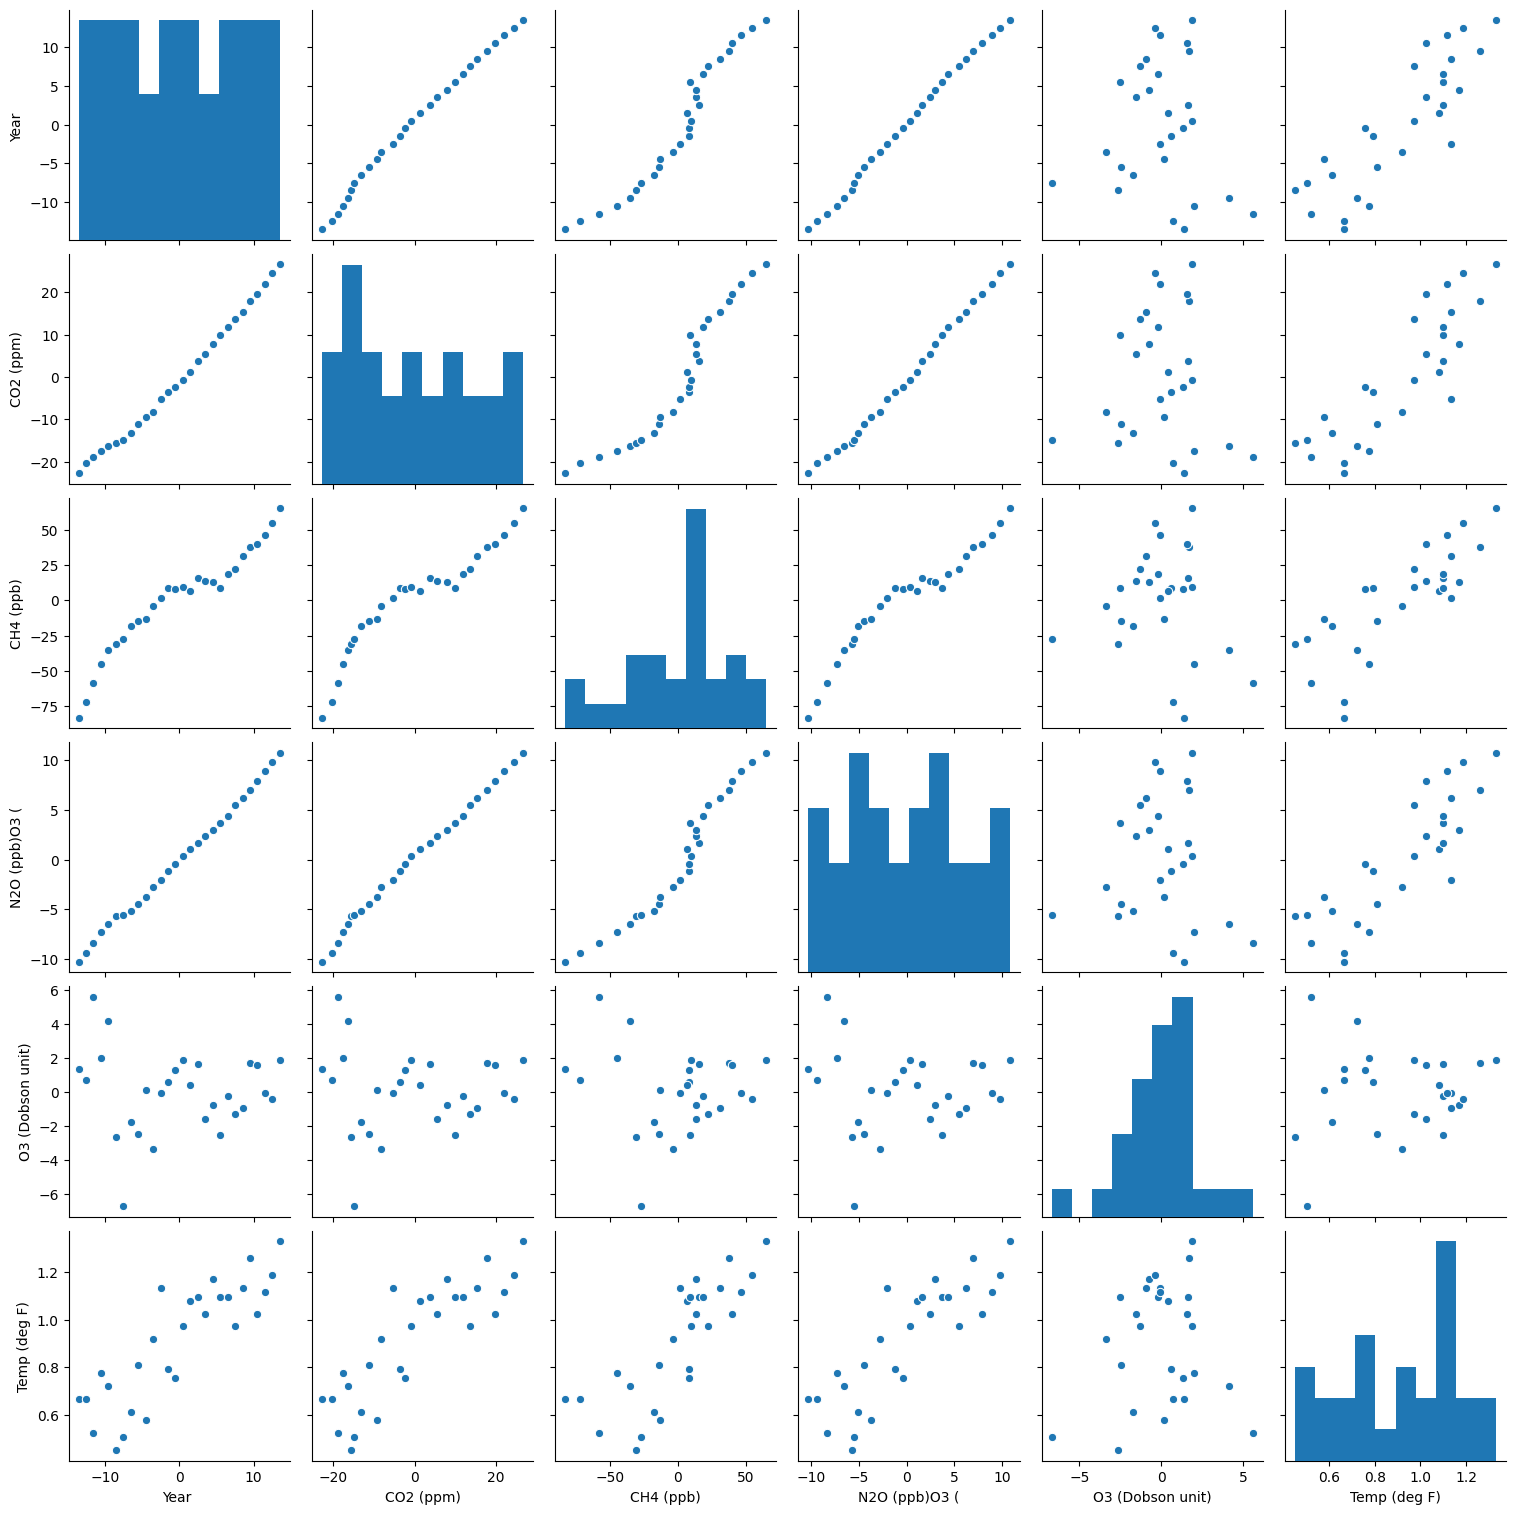

In [11]:
# Data Visualization

sns.pairplot(data_ms)
plt.show()

### Observations from data visualization

The Year, CO2, CH4, N2O are highly correlated. There is no significaant linear relationship is observed between O3 and Temp. Temperature is linearly realted with the year, CO2, CH4, N2O.

In [12]:
X=data_ms.drop(['Temp (deg F)'],axis=1)
y=data_ms[['Temp (deg F)']]

In [13]:
# multi linear regression model: y=B0+B_.X
# Here B_params is transpose of B_ matrix
# B_params = [B_1,B_2, B_3, B_4, B_5] where Temp=B0+B_1*Year+B_2*CO2+B_3*CH4+B_4*N2O+B_5*O3

print('*Considering all the independent features*')
B_params,B0=multi_linear_reg(X,y)
print(B0)
B_params

*Considering all the independent features*
3
Temp (deg F)    0.909643
dtype: float64


3,Year,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit)
0,0.081275,0.038324,0.003039,-0.184811,0.012921


In [14]:
print('*Considering only concentration of gases*')
B_params,B0=multi_linear_reg(X.drop(['Year '],axis=1),y)
print(B0)
B_params

*Considering only concentration of gases*
3
Temp (deg F)    0.909643
dtype: float64


3,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit)
0,0.061097,0.004851,-0.142275,0.006065


## Part (a) - Solution

The global temperature positively correlated with increase in the concentration of CO2,CH4 and,O3 gases and negatively correlated with increase in the concentration of O3.

## Part (b)

Estimate the error variance in temperature measurements and confidence intervals
(CIs) for all regression coefficients. Based on residual analysis, remove samples
suspected of being outliers (one at a time) until there are no outliers.

In [15]:
# sigma^2=((y-y_hat)^2)/N-p-1

X_g=X.drop(['Year '],axis=1)
estimated_y=np.dot(X_g,B_params.T)+B0[0]
error=np.subtract(y,estimated_y)
sq_error=sum(error.values**2)
error_variance=sq_error/(len(y)-4-1)
print('Error variance in temperature measurements is',error_variance[0])

Error variance in temperature measurements is 0.018009367940148225


### Confidence intervals for regression coefficients

CI=  [B-t.*s.e(B),B+t.*s.e(B)] 

where s.e(B_j)=sigma.*root(C_jj), C=inverse(X_T.*X)

alpha=0.05 and t value at (n-p-1,alpha/2) i.e, t value at 0.025 and 23 df

T-table: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf 

from t table, t value with 23 df and 95% CI is 2.069

In [16]:
from math import sqrt

t=2.069
sigma=np.sqrt(error_variance)

X_g=X.drop(['Year '],axis=1)
C=np.linalg.pinv(np.dot(X_g.T,X_g))
C=np.sqrt(C)
CI=[] # confidence intervals

for i in range(len(X_g.columns)):
    SE=sigma*sqrt(C[i][i])
    CI.append([B_params.iloc[0][i]-t*SE[0],B_params.iloc[0][i]+t*SE[0]])
    print('The confidence intervals of regression coefficient of',X_g.columns[i],'is:',CI[-1])
    

The confidence intervals of regression coefficient of CO2 (ppm) is: [-0.08924042354184919, 0.21143373464652654]
The confidence intervals of regression coefficient of CH4 (ppb) is: [-0.04504964282753206, 0.05475126797992809]
The confidence intervals of regression coefficient of N2O (ppb)O3 ( is: [-0.40115091704658107, 0.11660034956863613]
The confidence intervals of regression coefficient of O3 (Dobson unit) is: [-0.07536079353081503, 0.08749143949119355]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


### Zero is present in all the confidence intervals of regression coefficients, which means they are insignificant. As the independent variables observed to be depended, Let's see if the confidence intervals change when some of the independent variables are dropped.

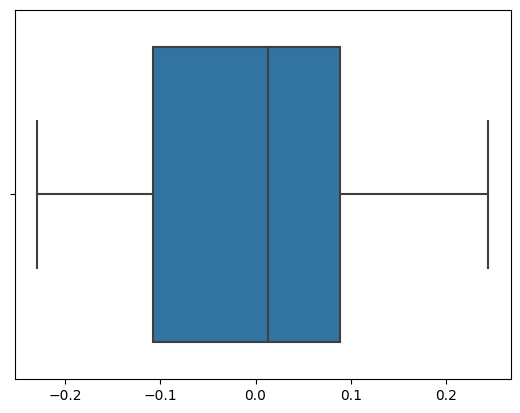

In [17]:
# Outlier detection by using IQR (Inter Quartile Range) i.e, [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

sns.boxplot(error)
plt.show()

No Outliers are found

In [18]:
print('Squared error is',sq_error[0])

Squared error is 0.41421546262340914


# part (b) - solution

Error variance in temperature measurements is 0.018009367940148225

#### Confidence Intervals
The confidence intervals of regression coefficient of CO2 (ppm) is: [-0.08924042354184919, 0.21143373464652654]

The confidence intervals of regression coefficient of CH4 (ppb) is: [-0.04504964282753206, 0.05475126797992809]

The confidence intervals of regression coefficient of N2O (ppb)O3 ( is: [-0.40115091704658107, 0.11660034956863613]

The confidence intervals of regression coefficient of O3 (Dobson unit) is: [-0.07536079353081503, 0.08749143949119355]

#### Outliers

No Outliers are found

## Part (c)
Improve the regression model obtained in step (b) by dropping unimportant
(insignificant) variables (one at a time)

In [19]:
data.drop(['Year '],axis=1).corr()

3,CO2 (ppm),CH4 (ppb),N2O (ppb)O3 (,O3 (Dobson unit),Temp (deg F)
3,,,,,
CO2 (ppm),1.000000,0.946248,0.997231,-0.010862,0.855976
CH4 (ppb),0.946248,1.000000,0.964379,-0.088517,0.807377
N2O (ppb)O3 (,0.997231,0.964379,1.000000,-0.036824,0.847564
O3 (Dobson unit),-0.010862,-0.088517,-0.036824,1.000000,0.083734
Temp (deg F),0.855976,0.807377,0.847564,0.083734,1.000000


From correlation, the order of importance of features is O3, CH4, N2O,CO2

On another note, as CO2 and N2O are highly correlated and N2O is less correlated to Temperature compared to CO2, first we can drop N2O. secondly, CO2 and CH4 are also highly correlated and CO2 is more correlated to Temperature, secondly CH4 can be droped. Thirdly O3, followed by CO2 would be the second considered order. i.e, N2O, CH4, O3, CO2

In [20]:
# first order

X_g.columns=['CO2','CH4','N2O','O3']
imp_fea=['O3','CH4','N2O','CO2']
X_new=X_g.copy()
B_params_new=B_params.copy()
print('Squared Error with features',X_new.columns,'is',sq_error[0])
for fea in imp_fea:
    if fea !='CO2':
        X_new=X_new.drop([fea],axis=1)
        B_params_new,B0_new=multi_linear_reg(X_new,y)
        estimated_y_new=np.dot(X_new,B_params_new.T)+B0_new[0]
        error_new=np.subtract(y,estimated_y_new)
        sq_error_new=sum(error_new.values**2)
        print('Squared Error with features',X_new.columns,'is',sq_error_new[0])

Squared Error with features Index(['CO2', 'CH4', 'N2O', 'O3'], dtype='object') is 0.41421546262340914
Squared Error with features Index(['CO2', 'CH4', 'N2O'], dtype='object') is 0.4191893034146299
Squared Error with features Index(['CO2', 'N2O'], dtype='object') is 0.44489450495014565
Squared Error with features Index(['CO2'], dtype='object') is 0.45615533152560056


In [21]:
# second order

X_g.columns=['CO2','CH4','N2O','O3']
imp_fea=['N2O','CH4','O3','CO2']
X_new=X_g.copy()
B_params_new=B_params.copy()
print('Squared Error with features',X_new.columns,'is',sq_error[0])
for fea in imp_fea:
    if fea !='CO2':
        X_new=X_new.drop([fea],axis=1)
        B_params_new,B0_new=multi_linear_reg(X_new,y)
        estimated_y_new=np.dot(X_new,B_params_new.T)+B0_new[0]
        error_new=np.subtract(y,estimated_y_new)
        sq_error_new=sum(error_new.values**2)
        print('Squared Error with features',X_new.columns,'is',sq_error_new[0])

Squared Error with features Index(['CO2', 'CH4', 'N2O', 'O3'], dtype='object') is 0.41421546262340914
Squared Error with features Index(['CO2', 'CH4', 'O3'], dtype='object') is 0.44100302085122467
Squared Error with features Index(['CO2', 'O3'], dtype='object') is 0.4413842859911566
Squared Error with features Index(['CO2'], dtype='object') is 0.45615533152560056


## Part (c) - Solution 

The models with [CO2,CH4,N20,O3] and ['CO2', 'CH4', 'N2O'] are performing nearly same as the squared error values are very near. As the second model has low features, considering the model complexity, model with ['CO2', 'CH4', 'N2O']  as features is considered as improved regreddion model. If we further consider squared error of 0.456 is not indifferent from 0.414, we can consider only CO2 as independent feature and predict the temparatures. The error values are close and the consideration of model depends on the error tolerance. For this case, I am considering model with CO2, CH4, NO2 as optimal model.

## Part (d)
The effect of different gases on the global temperature is expressed in terms of CO2
equivalents or global warming potential (GWP). Is it possible to make any inference
regarding GWP of the gases from the regression coefficients? Compare the GWP
obtained from regression coefficients to the values obtained over a 20 year time horizon:
CO2 (1), CH4 (86), N2O (289)

In [22]:
# Reference values: CO2 (1), CH4 (86), N2O (289)
# As the the GWP value is in terms of CO2, 
# lets divide the regression coefficients of CH4 and N2O with regression coefficient of CO2.

# OLS

CO2_OLS=0.061097
CH4_OLS=0.004851
N2O_OLS=0.142275

CO2_OLS_GWP=(CO2_OLS/CO2_OLS)
CH4_OLS_GWP=(CH4_OLS/CO2_OLS)*1000 #convert ppb to ppm
N2O_OLS_GWP=(N2O_OLS/CO2_OLS)*1000 #convert ppb to ppm

print('GWP obtained from OLS regression coefficents: CO2(',CO2_OLS_GWP,'),','CH4(',CH4_OLS_GWP,'),','N2O(',N2O_OLS_GWP,')' )
# # TLS

# CO2_TLS=
# CH4_TLS=
# N2O_TLS=

# CO2_TLS_GWP=CO2_TLS/CO2_TLS
# CH4_TLS_GWP=CH4_TLS/CO2_TLS
# N2O_TLS_GWP=N2O_TLS/CO2_TLS

# print('GWP obtained from TLS regression coefficents: CO2(',CO2_TLS_GWP,')','CH4(',CH4_TLS_GWP,')','N2O(',N2O_TLS,')' )

GWP obtained from OLS regression coefficents: CO2( 1.0 ), CH4( 79.39833379707679 ), N2O( 2328.674075650196 )


# Part (d) - Solution

GWP values of CO2 and CH4 are close to obtained GWP values. Where GWP value of N20 is almost 10 times of the obtained N2O GWP. From the results, the affect of N2O on global temperature has increased rapidly. 

# Question 2

Consider the problem of developing a correlation between saturated pressure (Psat
) and
saturated temperature T (boiling point). For pure components, the Antoine equation
given below generally fits the data well

𝑙n(𝑃_sat) = 𝐴 − 𝐵/(𝑇 + 𝐶)

For n-hexane, the values of the constants are A = 14.0568, B = 2825.42, and C = 230.44
where Psat is given in kPa and T in deg C. Using this correlation a data set consisting of
100 samples have been generated in the temperature range 10 - 70 deg C . Gaussian
measurements errors to both the true temperature and saturated pressures with standard deviations of 0.18 deg C and 2 kPa , respectively, have been added to generate the
measurements (available in vpdata.mat)

In [23]:
import scipy.io
data_mat = scipy.io.loadmat('vpdata.mat')

In [24]:
# Data prepocessing, in .mat file, the data is in a dictionary. 
# Therefore, converting the data in dictionary format to dataframe

temp=[]
psat=[]

for i in range(len(data_mat['temp'])):
    temp.append(data_mat['temp'][i][0])
    psat.append(data_mat['psat'][i][0])
data=pd.concat([pd.DataFrame(temp),pd.DataFrame(psat)],axis=1)
data.columns=['temp','psat']
data.head()

,temp,psat
0,37.114450,29.315594
1,32.986367,28.547205
2,57.152844,66.982238
3,31.646108,24.656088
4,41.677937,39.074630


## Part (a)
The Classius-Clapeyron equation is a theoretically derived model between Psat and T
and is given by

𝑙n(𝑃_sat) = 𝐴′ − 𝐵′/T

Assuming that temperature measurements are noise-free and pressure measurements are
noisy, use linear regression to obtain estimates of parameters A’ and B’.

In [25]:
# Assume X=1/T and y=ln(p), the the model equation becomes y=a*X+b

X=np.divide(1,data.temp)
y=np.log(data.psat)  # Assuming error in psat are normal
data_new=pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
data_new.columns=['X','y']

In [26]:
# mean shift the data

# data_new=mean_shift(data_new)
# data_new

In [27]:
# fit OLS as X is assumed to be noise free

a_OLS,b_OLS=getOLS(data_new,'X','y')

Syu: -0.008916949173671578 Suu: 0.00023530071083357592
Slope Parameter of OLS: -37.895972103451825
Offset Parameter of OLS: 4.760732187067934


In [28]:
A=b_OLS
B=-a_OLS
print('Parameter estimate of A is',A,'and of B is',B)

Parameter estimate of A is 4.760732187067934 and of B is 37.895972103451825


# part (a) - solution

Parameter estimate of A = 4.761

Parameter estimate of B = 37.896

## Part (b)

Assuming that temperature measurements are noise-free and pressure measurements
are noisy, use nonlinear regression to obtain estimates of parameters A, B and C

In [29]:
# Assume X=1/T and y=ln(p), the the model equation becomes y=a*X+b

X=data.temp
y=np.log(data.psat)  # Assuming error in psat are normal
data_new2=pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)
data_new2.columns=['X','y']
data_new2.head()

,X,y
0,37.114450,3.378120
1,32.986367,3.351559
2,57.152844,4.204427
3,31.646108,3.205024
4,41.677937,3.665473


In [30]:
# mean shift

# data_new2=mean_shift(data_new2)
# data_new2.head()

In [31]:
X=data_new2.X
y=data_new2.y

In [32]:
def objective(X,A,B,C):
    return A-(B/(X+C))

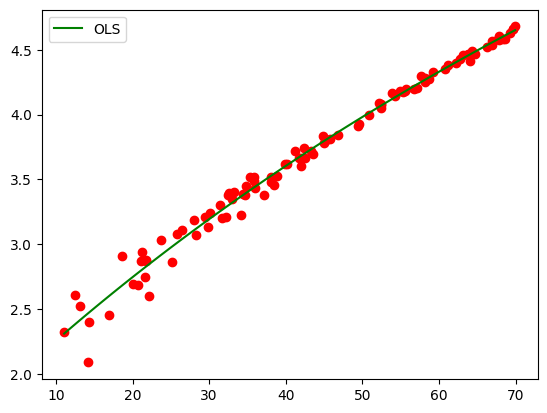

Beta: [  13.08128121 2281.88178669  200.7819102 ]
Beta Std Error: [  1.69718814 820.44997012  43.29743098]
Beta Covariance: [[4.79604228e+02 2.31718998e+05 1.22079985e+04]
 [2.31718998e+05 1.12079771e+08 5.91144144e+06]
 [1.22079985e+04 5.91144144e+06 3.12138461e+05]]
Residual Variance: 0.006005884446867539
Inverse Condition #: 8.970632610496292e-06
Reason(s) for Halting:
  Sum of squares convergence


In [33]:
#  we have to use scipy.odr which uses orthogonal distance. fit_type=2 indicates OLS

from scipy.odr import ODR, Model, RealData

def function(beta,X):
    A,B,C=beta[0],beta[1],beta[2]
    return A-(B/(X+C))

model = Model(function)
data_real=scipy.odr.Data(X,y)

odr = ODR(data_real, model,beta0=[1.,1.,1.])

xn = np.linspace(min(X),max(X),100)
plt.plot(X,y,'ro')
odr.set_job(fit_type=2)
output = odr.run()
yn = function(output.beta, xn)
plt.plot(xn,yn,'g-',label='OLS')
plt.legend(loc=0)
plt.show()
output.pprint()

In [34]:
print('Parameter Estimate of A is', 13.08)
print('Parameter Estimate of B is', 2281.88)
print('Parameter Estimate of C is',  200.78)

Parameter Estimate of A is 13.08
Parameter Estimate of B is 2281.88
Parameter Estimate of C is 200.78


# Part (b) - solution

Parameter Estimate of A = 13.08

Parameter Estimate of B = 2281.88

Parameter Estimate of C = 200.78


# Part (c)

Assuming both pressures and temperature measurements are noisy apply weighted
total least squares obtain estimates of parameters A, B, and C. Use the inverse of standard
deviation of errors as weights to set up the nonlinear optimization problem.

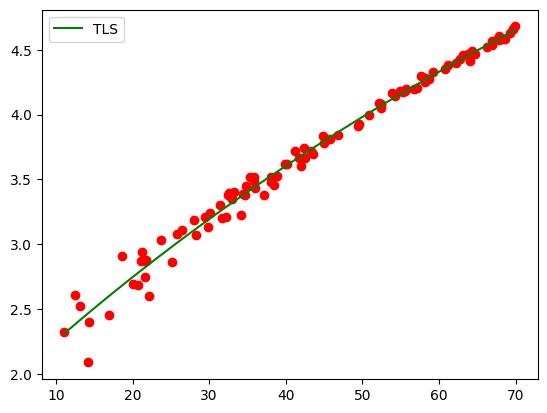

Beta: [  13.0707509  2276.71854583  200.50555396]
Beta Std Error: [  1.6929195  817.4548417   43.18763611]
Beta Covariance: [[4.78207655e+02 2.30780953e+05 1.21721357e+04]
 [2.30780953e+05 1.11499122e+08 5.88738834e+06]
 [1.21721357e+04 5.88738834e+06 3.11216614e+05]]
Residual Variance: 0.005993163057415993
Inverse Condition #: 9.000367963318945e-06
Reason(s) for Halting:
  Sum of squares convergence


In [35]:
#  For considering error in independent variable, we have to use scipy.odr which uses orthogonal distance. fit_type=0 indicates TLS

from scipy.odr import ODR, Model, RealData

def function(beta,X):
    A,B,C=beta[0],beta[1],beta[2]
    return A-(B/(X+C))

model = Model(function)
data_real=scipy.odr.Data(X,y)

odr = ODR(data_real, model,beta0=[1.,1.,1.])

xn = np.linspace(min(X),max(X),100)
plt.plot(X,y,'ro')
odr.set_job(fit_type=0)
output = odr.run()
yn = function(output.beta, xn)
plt.plot(xn,yn,'g-',label='TLS')
plt.legend(loc=0)
plt.show()
output.pprint()

In [36]:
print('Parameter Estimate of A is', 13.07)
print('Parameter Estimate of B is', 2276.72)
print('Parameter Estimate of C is', 200.50)

Parameter Estimate of A is 13.07
Parameter Estimate of B is 2276.72
Parameter Estimate of C is 200.5


# Part (c) - solution

Parameter Estimate of A = 13.07

Parameter Estimate of B = 2276.72

Parameter Estimate of C = 200.5

## Part (d)
For the models obtained in (a), (b), and (c) report the maximum error in predicting the
saturated pressures using the identified model for the sample data.

In [37]:
model_A=[4.760732187067934,37.895972103451825]
model_B=[  13.08128121, 2281.88178669,  200.7819102 ]
model_C=[13.0707509, 2276.71854583, 200.50555396]

In [38]:
estimated_y_A=model_A[0]-np.multiply(model_A[1],np.divide(1,data.temp))
estimated_y_B=model_B[0]-np.divide(model_B[1],np.add(data_new2.X,model_B[2]))
estimated_y_C=model_C[0]-np.divide(model_C[1],np.add(data_new2.X,model_B[2]))

In [39]:
error_A=np.sum(np.sqrt(np.subtract(y,estimated_y_A)))
error_B=np.sum(np.sqrt(np.subtract(y,estimated_y_B)))
error_C=np.sum(np.sqrt(np.subtract(y,estimated_y_C)))

C:\Users\himas\AppData\Roaming\Python\Python37\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
error_A,error_B,error_C

(21.299279834631026, 10.206109879235179, 8.192712142960858)

## Part (d) - Solution

Maximum Squared error is produced by model from part (a) and it is equal to 21.299

# Question 3

A zoologist obtained measurements of the mass (in grams), the snout-vent length
(SVL) and hind limb span (HLS) in mm of 25 lizards. The mean and covariance
matrix of the data about the mean are given by

X.T=[9, 68, 123] and S=[[7,21,34],[21,64,102],[34,102,186]]

## Part (a)
The largest eigenvalue of the above covariance matrix is 250.4. Determine the
normalized eigenvector corresponding to this eigenvalue. Also determine the remaining
eigenvalues and corresponding mutually orthogonal eigenvectors

In [41]:
from numpy.linalg import eig

S=[[7,21,34],[21,64,102],[34,102,186]]
X_bar=[[9], [68], [123]]
W,V=eig(S)   # eigen vectors are already normalized
print('Eigen values:', W)
print('Eigen vectors', V)

Eigen values: [2.50400915e+02 8.95711992e-02 6.50951385e+00]
Eigen vectors [[ 0.16191025  0.95890336 -0.23300092]
 [ 0.48767833 -0.28302089 -0.8258747 ]
 [ 0.85787815 -0.02008808  0.51346037]]


In [42]:
# eigen vector correspondng to 250.4 is p (done by hand calculations)
p=[0.188733383465708, 0.5684703912682,1]
magnitude_V0=np.linalg.norm(p)
print(magnitude_V0)
norm_V0=np.divide(p,magnitude_V0)
print('The normalized eigenvector corresponding to this eigenvalue 250.4 is',norm_V0)

1.1656667087049515
The normalized eigenvector corresponding to this eigenvalue 250.4 is [0.16191025 0.48767833 0.85787815]


In [43]:
for i in range(len(W)):
    print('The Eigen vector corressponding to',W[i],'is [',V[0][i],',',V[1][i],',',V[2][i],']')

The Eigen vector corressponding to 250.40091494719053 is [ 0.16191024591874054 , 0.48767832779557313 , 0.857878150359972 ]
The Eigen vector corressponding to 0.08957119921388516 is [ 0.9589033550947192 , -0.2830208909424421 , -0.020088078012520532 ]
The Eigen vector corressponding to 6.509513853595643 is [ -0.23300091814115964 , -0.8258747022936713 , 0.5134603667827891 ]


# Part (a) - Solutions

The normalized eigenvector corresponding to this eigenvalue 250.4 is [0.16191025, 0.48767833, 0.85787815]

The Eigen vector corressponding to 250.40091494719053 is [ 0.1619 , 0.4876 , 0.8578]

The Eigen vector corressponding to 0.08957119921388516 is [ 0.959 , -0.2830 , -0.020]

The Eigen vector corressponding to 6.509513853595643 is [ -0.233 , -0.8258 , 0.5134 ]

## Part (b)
How many principal components should be retained, if at least 95% of the variance
in the data has to be captured?

In [44]:
eigen_values=[2.50400915e+02, 6.50951385e+00,8.95711992e-02] #in order
for i in range(len(W)):
    print('Percentage of variance captured by',len(eigen_values[:i+1]),' pricical components is',sum(eigen_values[:i+1])/sum(eigen_values))

Percentage of variance captured by 1  pricical components is 0.9743226262726199
Percentage of variance captured by 2  pricical components is 0.9996514739331406
Percentage of variance captured by 3  pricical components is 1.0


## part (b) - Solution

One Principal component should be retained to capture at least 95% of the variance in the data

## Part (c)
Assuming that there are two linear relationships among the three variables, determine
one possible set of these linear relations.

In [89]:
# The two linear relationships are PCs of two smallest eigen values
# Linear Relationship: V_T.(X-X_bar)

from sympy import *

V2=[ 0.959 , -0.2830 , -0.020]
V3=[ -0.233 , -0.8258 , 0.5134 ]
var('x1,x2,x3')
X=[[x1], [x2], [x3]]
X_=np.subtract(X,X_bar)
lin_rel_1= np.sum(np.dot(V2,X_))
print('Linear Relationship 1:',lin_rel_1,'= 0')

lin_rel_2= np.sum(np.dot(V3,X_))
print('Linear Relationship 2:',lin_rel_2,'= 0')


Linear Relationship 1: 0.959*x1 - 0.283*x2 - 0.02*x3 + 13.073 = 0
Linear Relationship 2: -0.233*x1 - 0.8258*x2 + 0.5134*x3 - 4.8968 = 0


# Part (c) - Solution
Assuming two linear relationships, The two relationships are

0.959*x1 - 0.283*x2 - 0.02*x3 + 13.073 = 0

 -0.233*x1 - 0.8258*x2 + 0.5134*x3 - 4.8968 = 0

## Part (d)
Using the PCA model, determine the scores for a female lizard with the following
measurements: mass = 10.1 gms, SVL = 73mm and HLS = 135.5mm.

In [93]:
# X=[[10.1],[73],[135.5]]
X_=[[1.1],[5],[6.5]]    # X-X_bar
V1=np.array([ 0.1619 , 0.4876 , 0.8578])
V2=[ 0.959 , -0.2830 , -0.020]
V3=[ -0.233 , -0.8258 , 0.5134 ]
score1=np.dot(V1,X_)
print( 'score from V1:',score1)

score2=np.dot(V2,X_)
print( 'score from V2:',score2)

score3=np.dot(V3,X_)
print( 'score from V3:',score3)

print('Therefore scores for female lizard are', score1,score2,score3)

score from V1: [8.19179]
score from V2: [-0.4901]
score from V3: [-1.0482]
Therefore scores for female lizard are [8.19179] [-0.4901] [-1.0482]


# Part (d) - Solution

Therefore scores for female lizard are 8.19179, -0.4901, -1.0482

# Part (e)
Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm

In [94]:
# in the two linear equations, substitue 73 in x2 and solve

# The solution is hand solved and the answer is 10.66 gms

# Part (f)
Using the PCA model, estimate the mass of a lizard whose measured SVL is 73mm
and measured HLS is 135.5 mm.

In [95]:
# The solution is hand solved! 